In [1]:
print("OM NAMO BHAGVATE VASUDEVAY")

OM NAMO BHAGVATE VASUDEVAY


In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import models,layers,Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'potato1',
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

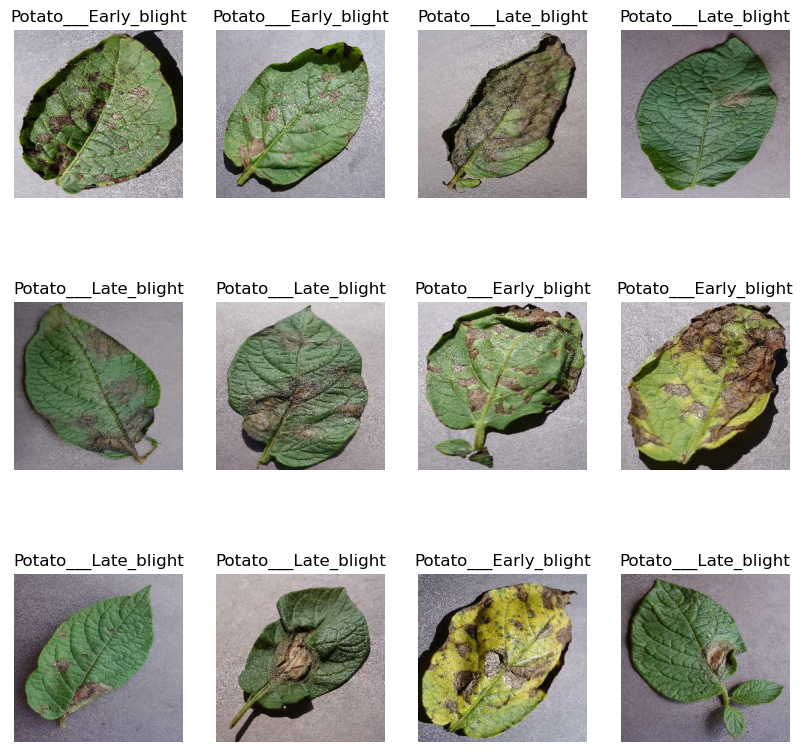

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [8]:
len(dataset)

68

In [9]:
train_size=.80
train_ds=len(dataset)*train_size

In [10]:
train_ds

54.400000000000006

In [11]:
train_ds=dataset.take(54)
len(train_ds)

54

In [12]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [13]:
val_size=.10
val_ds=len(dataset)*val_size

In [14]:
val_ds

6.800000000000001

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds,train_split=.8,val_split=.1,test_split=.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds


In [18]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [26]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical')
])

In [29]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    
    resize_rescale,
    data_augmentation,
    
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),optimizer='adam',metrics=['accuracy'])

In [35]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,epochs=50,validation_data=val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 504s 9s/step - accuracy: 0.4887 - loss: 0.9282 - val_accuracy: 0.7188 - val_loss: 0.8920
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 532s 10s/step - accuracy: 0.6677 - loss: 0.7897 - val_accuracy: 0.7917 - val_loss: 0.5625
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 500s 9s/step - accuracy: 0.7887 - loss: 0.5435 - val_accuracy: 0.8698 - val_loss: 0.3725
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 498s 9s/step - accuracy: 0.8792 - loss: 0.3061 - val_accuracy: 0.8750 - val_loss: 0.3745
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 504s 9s/step - accuracy: 0.8883 - loss: 0.2748 - val_accuracy: 0.9375 - val_loss: 0.1655
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 495s 9s/step - accuracy: 0.9332 - loss: 0.1770 - val_accuracy: 0.9107 - val_loss: 0.3213
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 494s 9s/step - accuracy: 0.9071 - loss: 0.2004 - val_accuracy: 0.8490 - val_loss: 0.3100
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 488s 9s/step - accuracy: 0.9512 - loss: 0.1366 - val_accuracy: 0.9688 - 

In [36]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0070


In [37]:
scores

[0.007696695625782013, 1.0]

In [38]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [42]:
max(history.history['accuracy'])

0.9976851940155029

In [43]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'trainning loss vs validation loss')

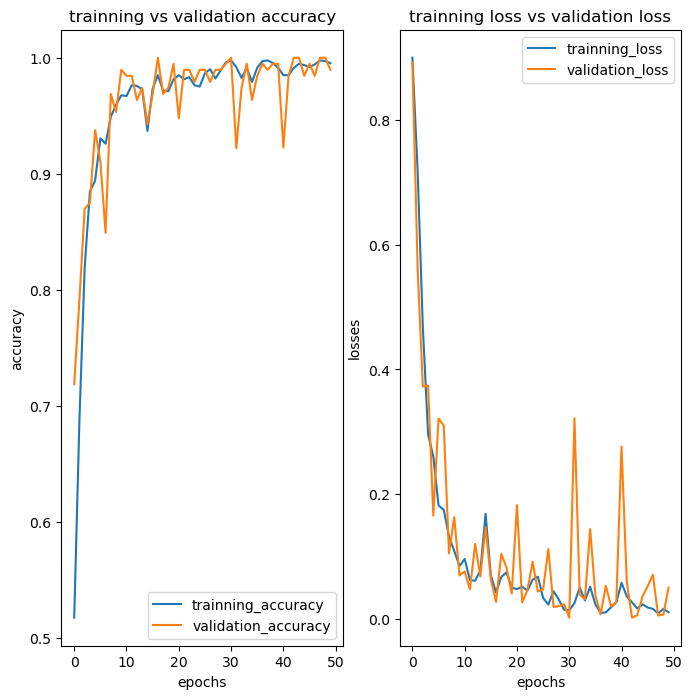

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='trainning_accuracy')
plt.plot(range(50),val_acc,label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('trainning vs validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),loss,label='trainning_loss')
plt.plot(range(50),val_loss,label='validation_loss')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend()
plt.title('trainning loss vs validation loss')


first image to predict
first image actual label is:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
prdicted label is : Potato___Early_blight


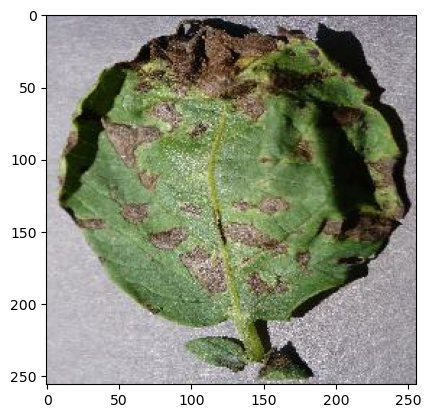

In [68]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_image_label=class_names[label_batch[0].numpy()]
    print('first image to predict')
    plt.imshow(first_image)
    print("first image actual label is: ",first_image_label )
    
    
    batch_prediction=model.predict(image_batch)
    print("prdicted label is :",class_names[np.argmax(batch_prediction[0])])
    

In [69]:
def predict(model,img):
    image_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array=tf.expand_dims(image_array,0)
    predictions=model.predict(image_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*np.max(predictions[0]),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


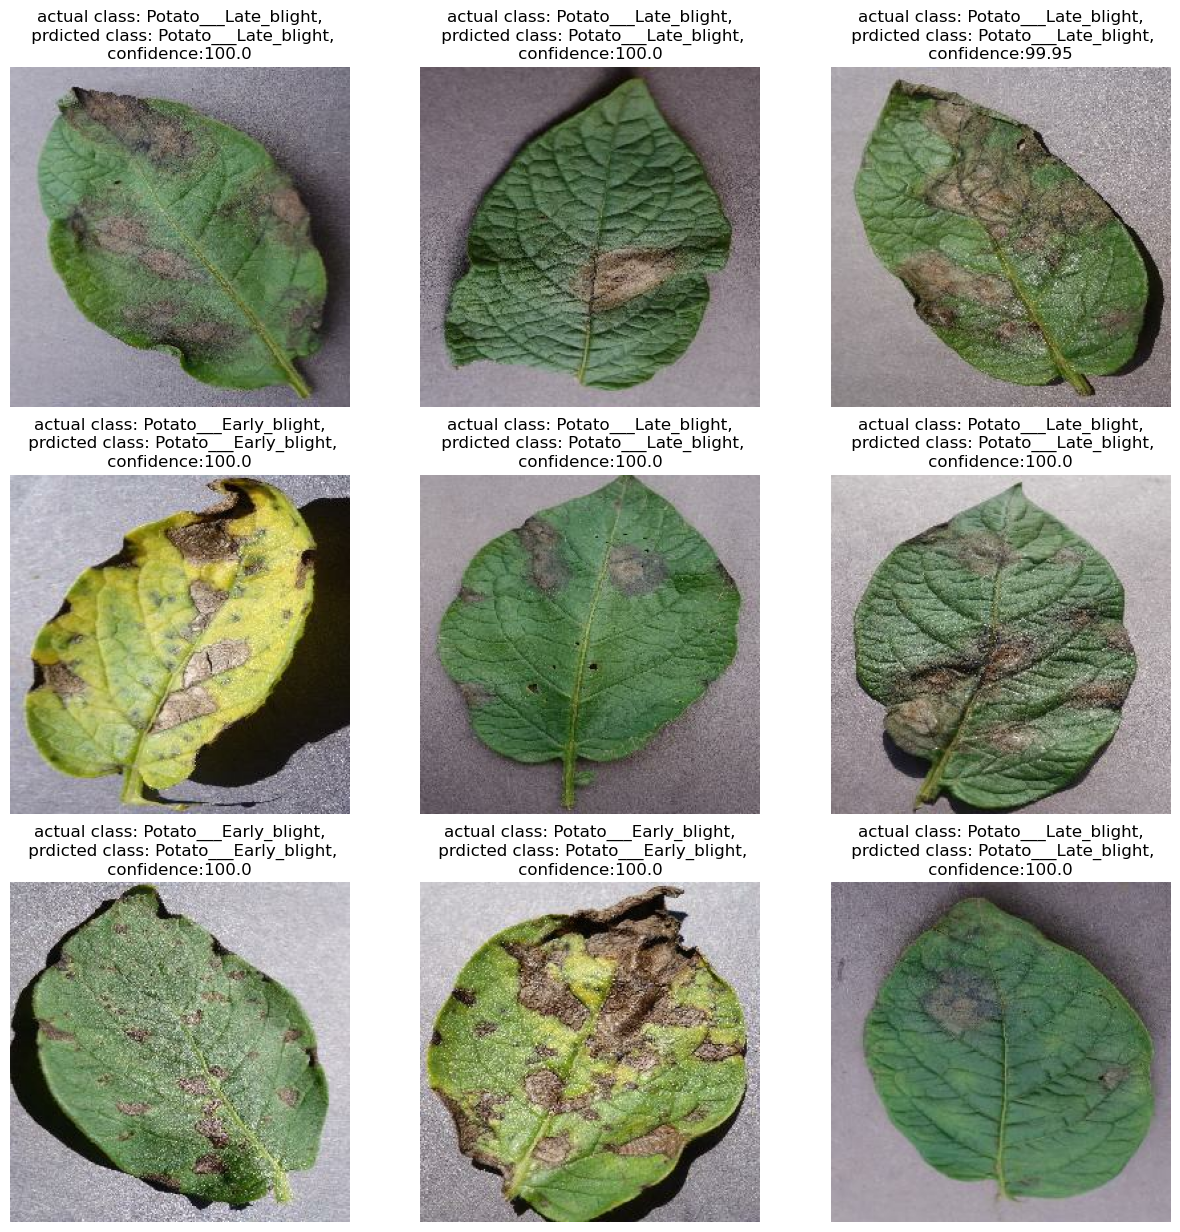

In [76]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"actual class: {actual_class},\n prdicted class: {predicted_class},\n confidence:{confidence} ")
        plt.axis('off')
        

In [85]:
# Save entire model
model_version = 1
model.save(f"../models/model_{model_version}.h5")


In [88]:
model.save("potato_keras.keras")